In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

G = nx.erdos_renyi_graph(100, 0.1, directed=True)

In [2]:
print ("Number of nodes in seed = {}, Number of edges in seed = {}".format(len(G.nodes()), len(G.edges())))

Number of nodes in seed = 100, Number of edges in seed = 1010


In [3]:
seed_users = list(G.nodes())
print ("Number of seed users = {}".format(len(seed_users)))

Number of seed users = 100


In [4]:
outer_nodes =  range(100, 300)
outer_edges = []
for u in seed_users:
    neighb = np.random.randint(25)
    v_list = np.random.choice(outer_nodes, neighb)
    for v in v_list:
        outer_edges.append((u, v))
        
G.add_nodes_from(outer_nodes)
G.add_edges_from(outer_edges)
print ("Number of nodes in G = {}, Number of edges in G = {}".format(len(G.nodes()), len(G.edges())))

Number of nodes in G = 300, Number of edges in G = 2246


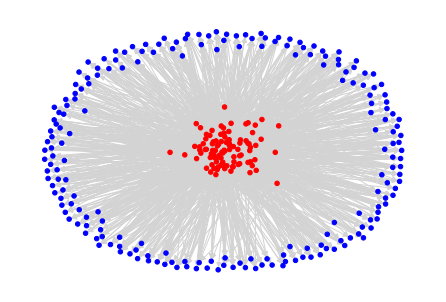

In [5]:
node_col = ['red'] * len(seed_users) # Seed nodes 
node_col.extend(['blue'] * len(outer_nodes)) # Outer nodes 
nx.draw(G, pos=nx.spring_layout(G), node_size=20, node_color=node_col, edge_color='lightgray')
plt.show()

In [6]:
df = pd.DataFrame({'user_id': seed_users})
df.to_csv("Data/Seed_users.csv", index=False)

In [7]:
fr_node = [el[0] for el in list(G.edges())]
to_node = [el[1] for el in list(G.edges())]
df = pd.DataFrame({'from': fr_node, 'to': to_node})
df.to_csv("Data/User_graph.csv", index=False)

In [8]:
from random import randrange
import datetime 

def random_date(start, l):
    current = start
    for ind in range(l):
        curr = current + datetime.timedelta(minutes=randrange(6000))
        yield curr



from_date = datetime.datetime(2019, 12, 10, 13, 0)

df = pd.DataFrame(columns=['user', 'time', 'hashtag'])
for ind in range(100):
    u_size = np.random.randint(len(G.nodes()))
    
    if ind == 0:
        hashtags = ["rt"] * u_size
    elif ind == 1:
        hashtags = ["nyc"] * u_size
    else:
        hashtags = ["#{0:02d}".format(ind)] * u_size
    times = random_date(from_date, u_size)
    users = np.random.choice(list(G.nodes()), u_size)
    
    df = df.append(pd.DataFrame({
        'user': users,
        'time': times,
        'hashtag': hashtags
    }))
    
df.to_csv("Data/actions.csv", index=False)
df.to_csv("Data/large_actions.csv", index=False)